In [41]:
# load libraries
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen

In [42]:
def linear_regression(dataset: np.array) -> np.array:

    beta = np.zeros(dataset.shape[1])

    #########################

    # Insert your code here #

    # This should be returning the beta vector with entries fitted to the dataset

    # Don't forget to add the intercept

    X = [] # This list will contain lists of the form [1, x_1, x_2, ... , x_n], so, I am looking for X to look like: [[1,x_11,x_12,...,x_1n], [1,x_21,x_22,...x_2n],..., [1,x_m1,x_m2,...,x_mn]]
    Y = [] # This list will simply contain the labels, so it will have form: [y_1,y_2,...,y_n]

    for point in dataset: # Filling X and Y with its entries as described above
      x = list(point) # x will be each individual [1,x_i1,x_i2,...x_in]
      del x[-1] # deleting the last entry in the current row of the dataset since that is supposed to be the label, y.
      x.insert(0, 1) # placing the 1 in front of the all the x vectors
      X.append(x) # adding the x vectors into X
      Y.append(point[-1]) # making the y vector

    X = np.array(X) # turning the lists into numpy arrays for matrix operations
    Y = np.array(Y)

    X = np.reshape(X, (len(X),len(dataset[0]))) # getting the matrices into their adequate shapes
    Y = np.reshape(Y, (len(Y),1))
    #print(X)
    #print(Y)

    XT = X.transpose() # Following the steps to compute beta
    #print(XT)

    XT_X = np.matmul(XT, X)
    #print(XT_X)
    inv_XT_X = np.linalg.inv(XT_X)
    #print(inv_XT_X)

    b = np.matmul(inv_XT_X, XT)
    beta = np.matmul(b,Y)
    beta = np.concatenate(beta)
    #########################

    return beta

In [43]:
def predict(beta: np.array, x: np.array) -> float:
    #######################

    # Insert your code here

    # Given the fitted parameters and a new unlabeled point, make a prediction for what this point's label should be

    # Make sure to add the intercept

    y = np.matmul(beta, x)

    return y

    #######################

In [127]:
path = 'teach.csv'

df = pd.read_csv(path)

labels = df.columns.tolist()
#print(labels)

datasets = {}
for label in labels:
  current_dataset = []
  for index, row in df.iterrows():
    current_x = [row[label],100*row['Goals']]
    current_dataset.append(current_x)

  current_dataset = np.array(current_dataset)
  datasets[label] = current_dataset

print(datasets)

betas = {}
for key, value in datasets.items():
  current_beta = linear_regression(value)
  betas[key] = current_beta

print(betas)
#print(dataset)

{'Nation': array([[ 0.,  0.],
       [ 1.,  6.],
       [ 2.,  4.],
       ...,
       [13.,  0.],
       [ 0.,  0.],
       [ 4.,  0.]]), 'Pos': array([[0., 0.],
       [0., 6.],
       [1., 4.],
       ...,
       [3., 0.],
       [3., 0.],
       [1., 0.]]), 'Squad': array([[ 0.,  0.],
       [ 1.,  6.],
       [ 2.,  4.],
       ...,
       [62.,  0.],
       [45.,  0.],
       [31.,  0.]]), 'Comp': array([[0., 0.],
       [1., 6.],
       [1., 4.],
       ...,
       [4., 0.],
       [0., 0.],
       [0., 0.]]), 'Age': array([[22.,  0.],
       [34.,  6.],
       [22.,  4.],
       ...,
       [24.,  0.],
       [19.,  0.],
       [24.,  0.]]), 'Born': array([[2000.,    0.],
       [1987.,    6.],
       [2000.,    4.],
       ...,
       [1997.,    0.],
       [2003.,    0.],
       [1998.,    0.]]), 'MP': array([[34.,  0.],
       [34.,  6.],
       [31.,  4.],
       ...,
       [ 3.,  0.],
       [ 3.,  0.],
       [20.,  0.]]), 'Starts': array([[32.,  0.],
       [34.,  6.],


In [131]:
#beta = linear_regression(dataset)
#print(beta)

#print(np.shape(beta))

dp = pd.read_csv("test.csv")

#count = 0
#diff = 0

predictions = {}
true_goals = []

for label in labels:
  predictions[label] = []
  for index, row in dp.iterrows():
    if row[label] != 'GcaDrib':
      x = [1, row[label]]
      predictions[label].append(predict(betas[label],x))


true_goals = []
for index, row in dp.iterrows():
  true_goals.append(100*row['Goals'])

#print(true_goals)

#print(predictions)

  #print(true_goals)
  #print(predictions)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE_values = {}
MSE_values = {}
R2_values = {}
for label in labels:
  #print(true_goals)
  #print(predictions[label])
  #print("======================")
  mae = mean_absolute_error(true_goals, predictions[label])
  mse = mean_squared_error(true_goals, predictions[label])
  R2 = r2_score(true_goals, predictions[label])

  MAE_values[label] = mae
  MSE_values[label] = mse
  R2_values[label] = R2


  #print(f"MAE = {mae}")
  #print(f"MSE = {mse}")
  #print(f"R^2 = {R2}")

print(R2_values)

#sorted_dict = dict(sorted(MAE_values.items(), key=lambda item: item[1], reverse=True))

# Print the sorted dictionary
print(sorted_dict)

#predict(beta,x3)


{'Nation': 0.0013242495279117694, 'Pos': 0.004909474980772988, 'Squad': -0.0007795132102972335, 'Comp': -0.0003469104375528609, 'Age': 0.0016556090011978775, 'Born': -6.532403017667221e-05, 'MP': 0.01585618698001834, 'Starts': 0.0035390893949522884, 'Min': 0.0037915598913065285, '90s': 0.0037612549912035, 'Shots': 0.12250466620190292, 'SoT': 0.17091114268613794, 'SoT%': 0.16165799276053217, 'G/Sh': 0.5316348496140312, 'G/SoT': 0.26103640971863495, 'ShoDist': 0.009164852274709423, 'ShoFK': -0.17845522511002976, 'ShoPK': 0.07682097757355377, 'PKatt': 0.07076122752873659, 'PasTotCmp': -0.0009984449466970968, 'PasTotAtt': -0.015573835820439585, 'PasTotCmp%': 0.003926033891417879, 'PasTotDist': 0.011060302694725022, 'PasTotPrgDist': 0.048356662496662706, 'PasShoCmp': -0.0009451180875197362, 'PasShoAtt': 0.001482292837012178, 'PasShoCmp%': 0.0037184855006514583, 'PasMedCmp': 0.015007082095352398, 'PasMedAtt': 0.000905942524020209, 'PasMedCmp%': 0.013037333311943122, 'PasLonCmp': 0.0166884536

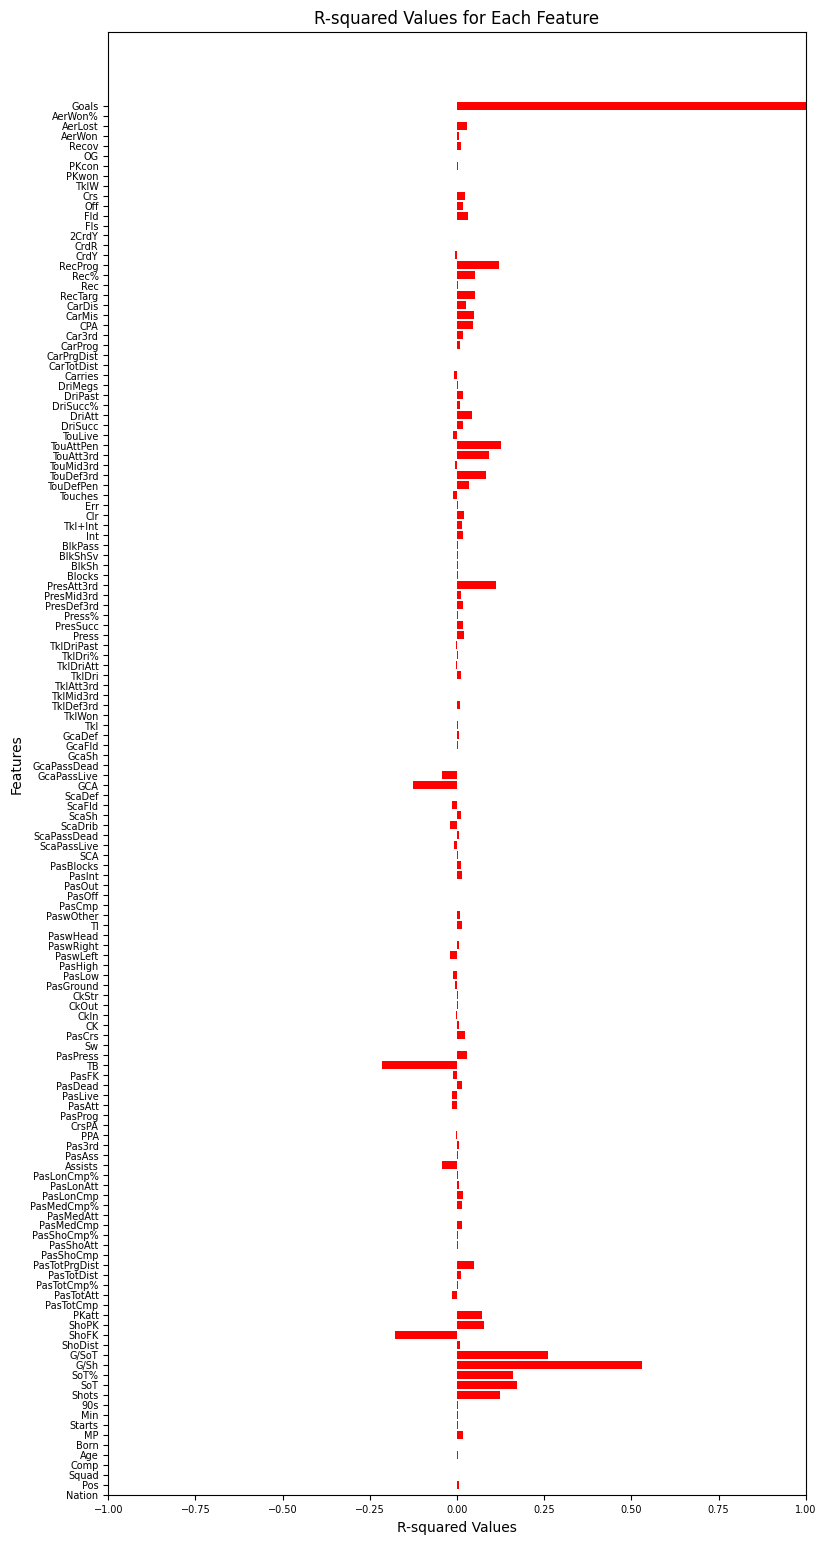

'labels = df.columns.tolist()\n#print(labels)\n\nX_for_each_feature = {}\n\ncurrent_X = []\nfor label in labels:\n  for index, row in df.iterrows():\n    current_X.append([row[label]])\n  X_for_each_feature[label] = current_X\n  current_X = []'

In [136]:

'''labels = list(R2_values.keys())
r_squared_values = list(R2_values.values())

# Plotting the bar graph
plt.barh(labels, r_squared_values, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('R-squared Values')
plt.xticks(rotation='horizontal', fontsize=7)
plt.yticks(fontsize = 4)

# Adjust spacing for x-axis labels
plt.title('R-squared Values for Each Label')
plt.ylim(bottom=0)  # Ensure the y-axis starts at 0
plt.show()'''

labels = list(R2_values.keys())
r_squared_values = list(R2_values.values())

plt.figure(figsize=(9, 19))
# Plotting the bar graph
plt.barh(labels, r_squared_values, color='red')
plt.xlabel('R-squared Values')
plt.ylabel('Features')
plt.xticks(rotation='horizontal', fontsize=7)
plt.yticks(fontsize=7)
plt.xlim(-1,1)


# Adjust spacing for x-axis labels
plt.title('R-squared Values for Each Feature')
plt.ylim(bottom=0)  # Ensure the y-axis starts at 0

# Add this line to adjust layout

plt.show()



'''labels = df.columns.tolist()
#print(labels)

X_for_each_feature = {}

current_X = []
for label in labels:
  for index, row in df.iterrows():
    current_X.append([row[label]])
  X_for_each_feature[label] = current_X
  current_X = []'''

#print(dataset)




#print(X_for_each_feature)

